In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import random as rd
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

# from scipy.fft import fft
from numpy.fft import fft,fftfreq

def limiar_SFT(espontaneo,alpha):
    # media do sinal espontâneo (ruído)
    return np.quantile(np.mean(espontaneo,axis=0), 1-alpha)

# https://www.gaussianwaves.com/2020/01/how-to-plot-fft-in-python-fft-of-basic-signals-sine-and-cosine-waves/

In [8]:
# Parametros de simulação
amostras = 10 # num de "indivíduos"
nSim = 10000 # aumentar (law of large numbers) 5*10**4

# frequencia do sinal
f0 = 10 

#frequencia de amostragem
fs = 100 

# Confiança desejada: (5% = padrão, 1% = "rigoroso")
alpha = 5/100 

# gerando ruido
N = round(fs*nSim/(f0*2*(np.pi)))
print(N)
arg = np.multiply(np.multiply(np.linspace(0,N,nSim),np.ones((amostras,nSim))),2*(np.pi)*f0/fs) # argumento do 
print(arg.shape)

energiaRuido = 1 # coincide com amplitude máx do ruido, pois média do ruido tende 0
ruido = energiaRuido*rd.randn(amostras,nSim) 

# gerando sinal, senoide em tempo discreto:
amplitude = 10 # escolha arbitrária (escolher amplitude com base na SNR)
theta0 = 0 # angulo inicial do sinal (e.g.: np.pi/6)
sinal = np.sin(arg+theta0) # gera senoide

# sinal = np.ones((amostras,nSim)) # gera constante


# Calcular valor crítico a partir do ruído: (depende da técnica utilizada, aqui feito manualmente)
# limiar = limiar_SFT(ruido, alpha)
limiar = np.quantile(np.mean(ruido,axis=0), 1-alpha)
print('Limiar:', limiar)

listaSNRs = np.linspace(-50,50,1000)
probDetec = np.zeros((len(listaSNRs),1))

15915
(10, 10000)
Limiar: 0.5118470677285761


In [9]:
print('Simulando')
xHist = np.zeros((len(listaSNRs),amostras,nSim))

for i, SNRi in enumerate(listaSNRs):
    amplitude = 10**(SNRi/20)*(energiaRuido**2)
    # print(ruido.shape)
    # print(sinal.shape)
    # print(np.multiply(amplitude,sinal).shape)
    
    x = ruido +(np.multiply(amplitude,sinal))
    xHist[i,:,:]= x
    
    # print(x.shape)
    sinalMedio = np.mean(x,axis = 0)

    probDetec[i] = np.mean(sinalMedio>limiar)

# Calculando fft:
X = fft(xHist)
print('Done')

Simulando
Done


(10, 10000)


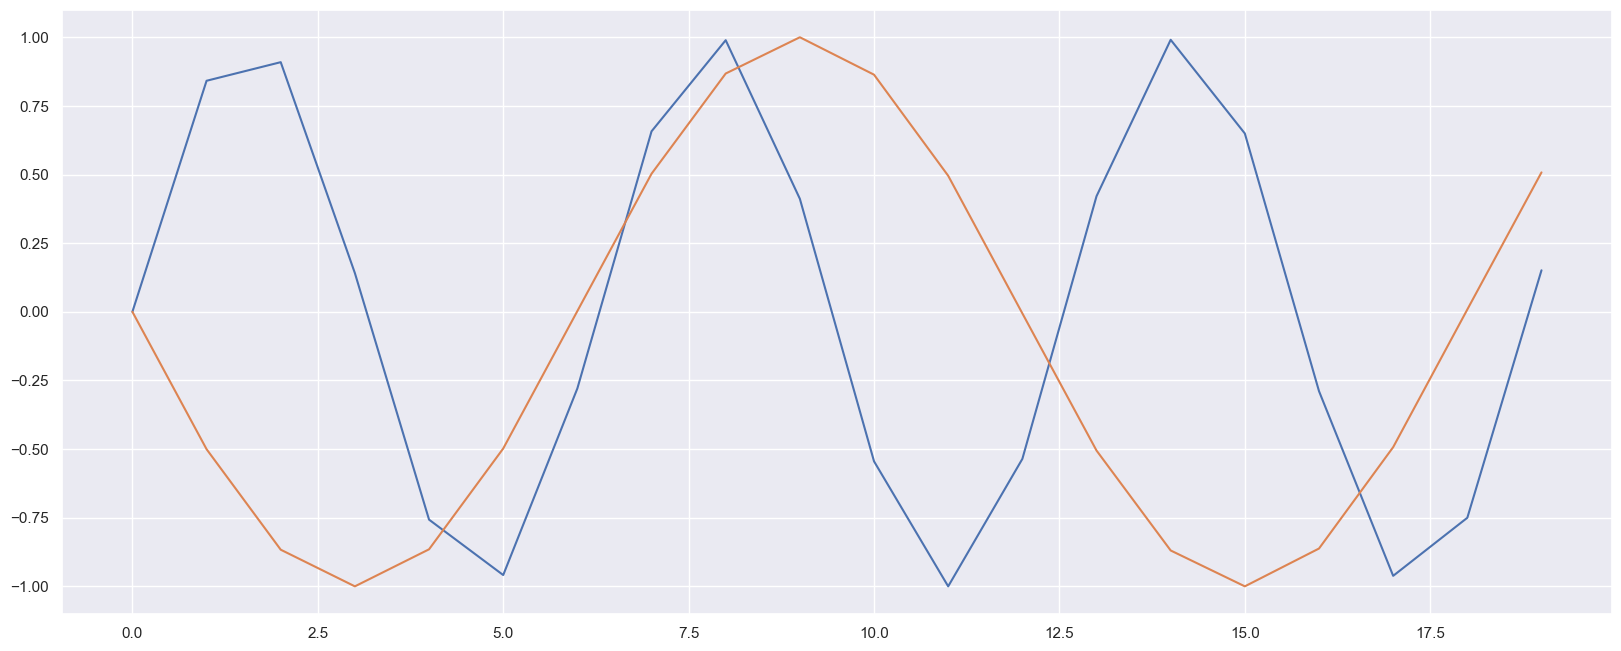

In [4]:
# plt.plot(sinal[0][0:20])
plt.plot(sinal[0][0:20])
OG = np.sin(np.multiply(np.multiply(np.linspace(0,N,nSim),np.ones((amostras,nSim))),2*(np.pi)*f0))
print(OG.shape)
plt.plot(OG[0][0:20])

In [5]:
# print(len(np.linspace(0,N,nSim)))
# print(fs/len(np.linspace(0,N,nSim)))
# plt.plot(sinal)
bin = round(nSim*f0/fs)
print(bin)
# print(len(X[999][1]))
# print(X[999][1][bin])
# print(X.shape)
# X = fft(sinal[0])
print(X.shape)


1000
(10000,)


1295649.1215464436
[1592 8408]


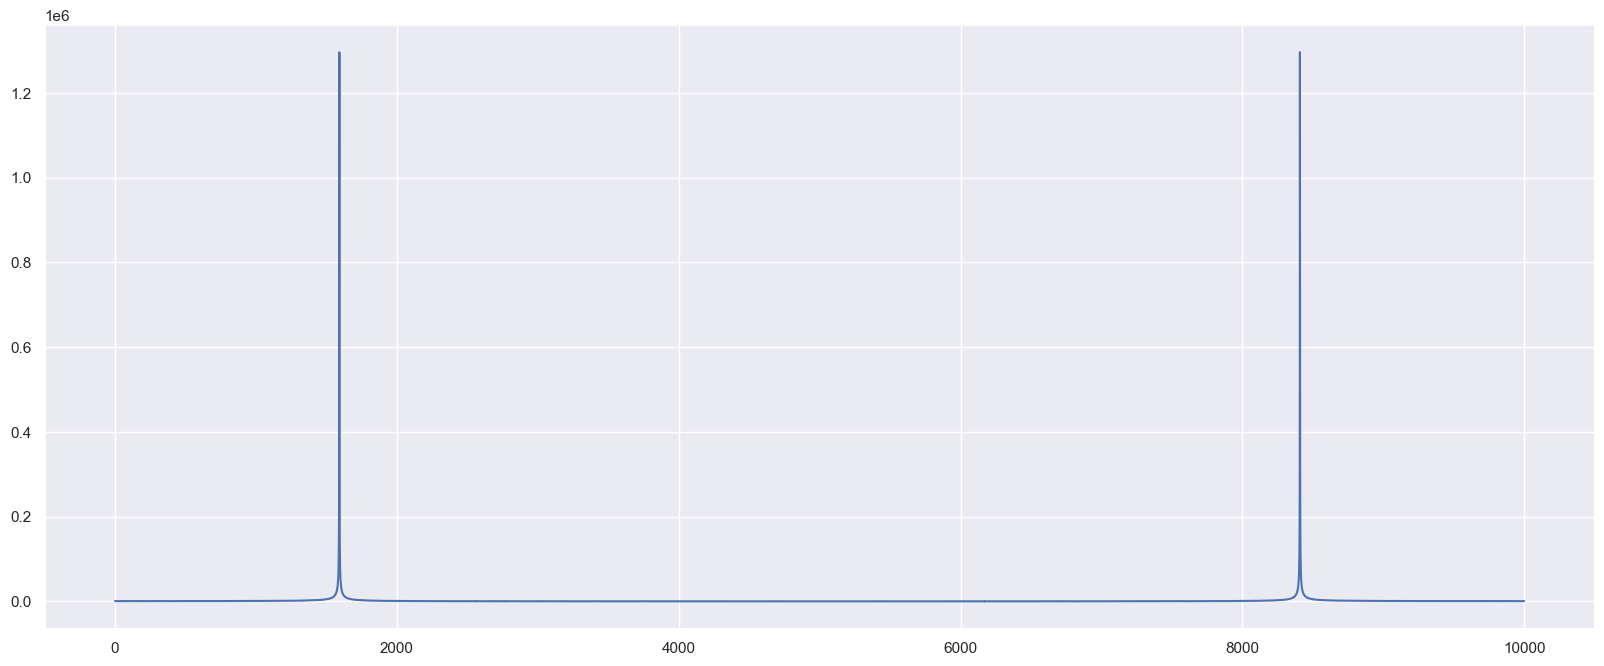

In [18]:
# uai = X[999][1]
# limiar_SFT = (np.absolute(X[999][1][])^2)/np.sum()
plt.plot(np.absolute(X[999][1]))
# print(np.absolute(X[bin]))
print(max(np.absolute(X[999][1])))
# plt.scatter(x=bin, y=np.absolute(X[999][1][bin]))
# print(X.shape)
# print(np.abs(X))
# print(np.angle(X))
index_of_maximum = np.where(np.absolute(X[999][1]) ==1295649.1215464436)
#  max(np.absolute(X[999][1])))
print(index_of_maximum[0])

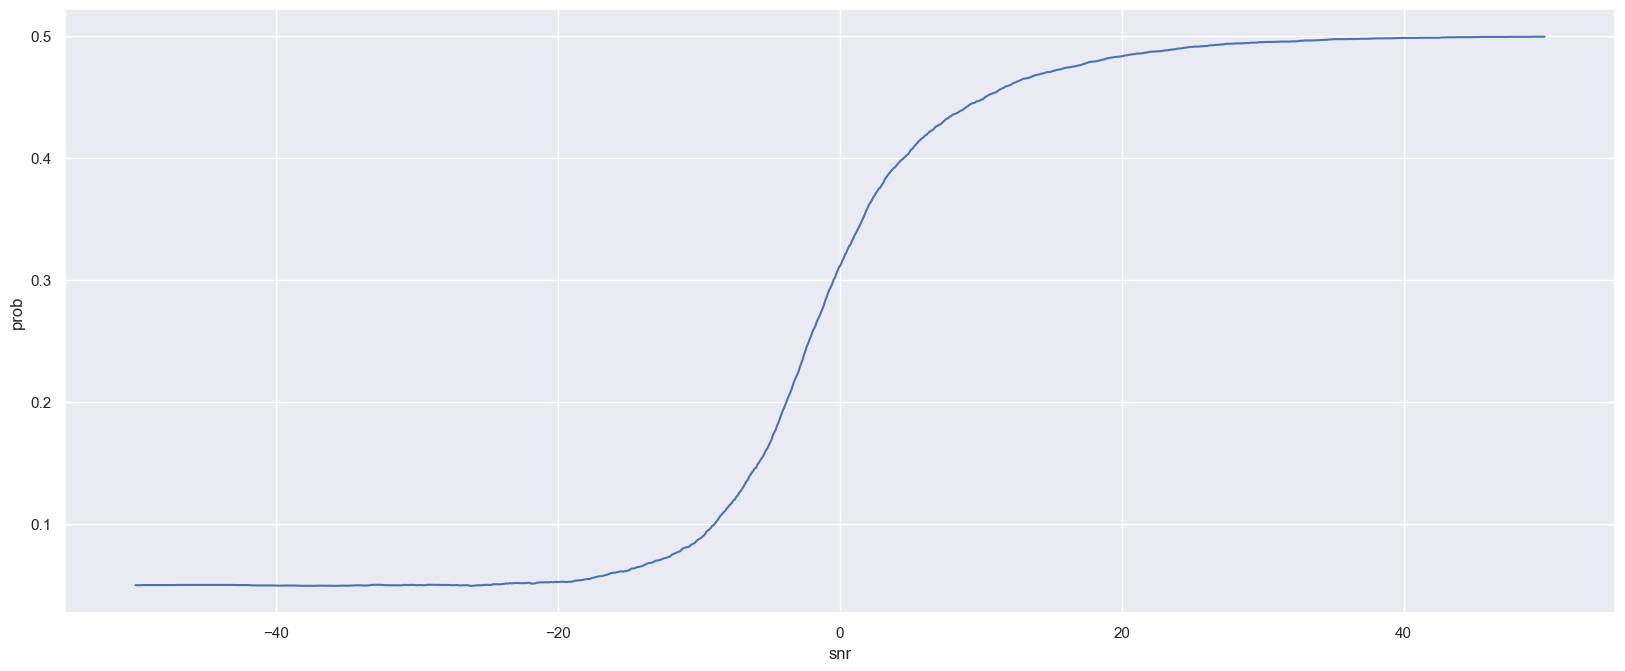

In [7]:
pD = pd.DataFrame({'snr': listaSNRs,'prob':probDetec[:,0]})
sns.lineplot(data = pD,x='snr',y='prob');

50


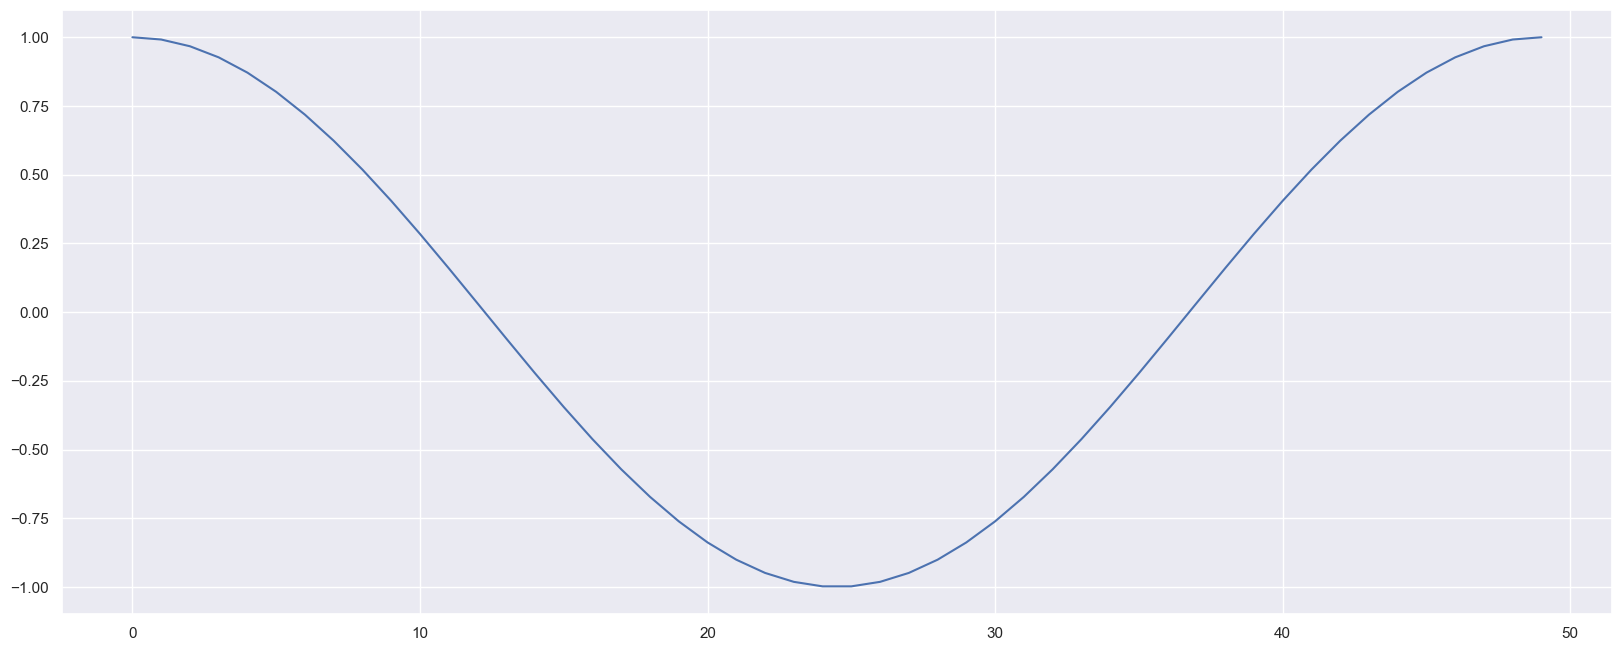

In [58]:
AAA = np.cos(np.linspace(0, 2*np.pi))
N = len(AAA)
print(N)
plt.plot(AAA)

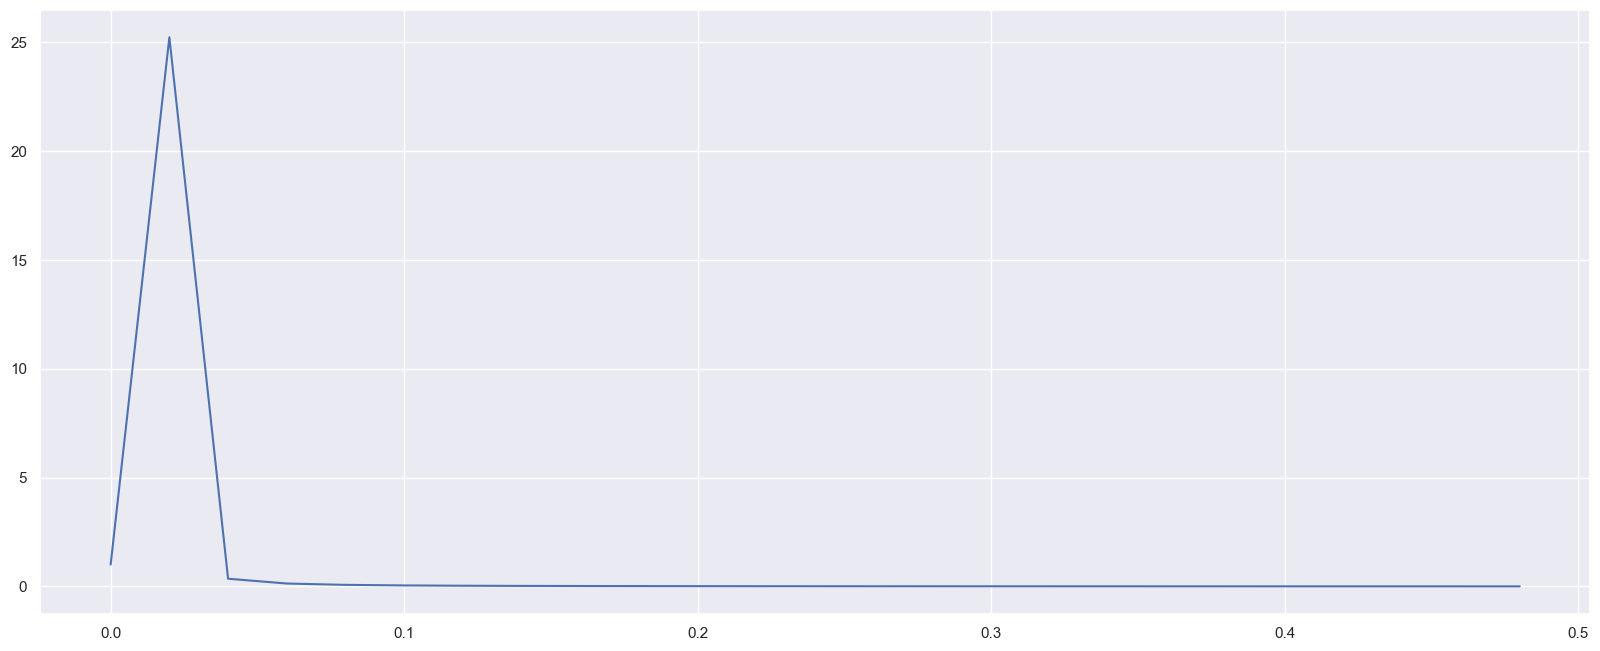

In [68]:
# https://stackoverflow.com/questions/3694918/how-to-extract-frequency-associated-with-fft-values-in-python
# https://en.wikipedia.org/wiki/Nyquist_frequency
# https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html

a = fft(AAA)
f = fftfreq(len(a))
# f = np.multiply(np.linspace(0,round(len(a)/2),round(len(a)/2)),100/len(a))
# print(len(np.linspace(0,round(len(a)/2))))
# f = [0:N/2]*fs/N;
# fftshift(fft(x,NFFT))
y = np.absolute(a)[0:round(len(a)/2)]
plt.plot(f[0:round(len(a)/2)],y)


In [64]:
binD = np.where(np.absolute(y) ==max(np.absolute(y)))
#  max(np.absolute(X[999][1])))
print(index_of_maximum[0])
print(y[0:5])
print(f[0:5])
print(y[binD])
print(f[binD]/2)

[1]
[ 1.         25.23591412  0.3509846   0.13004525  0.06885889]
[0.   0.02 0.04 0.06 0.08]
[25.23591412]
[0.01]


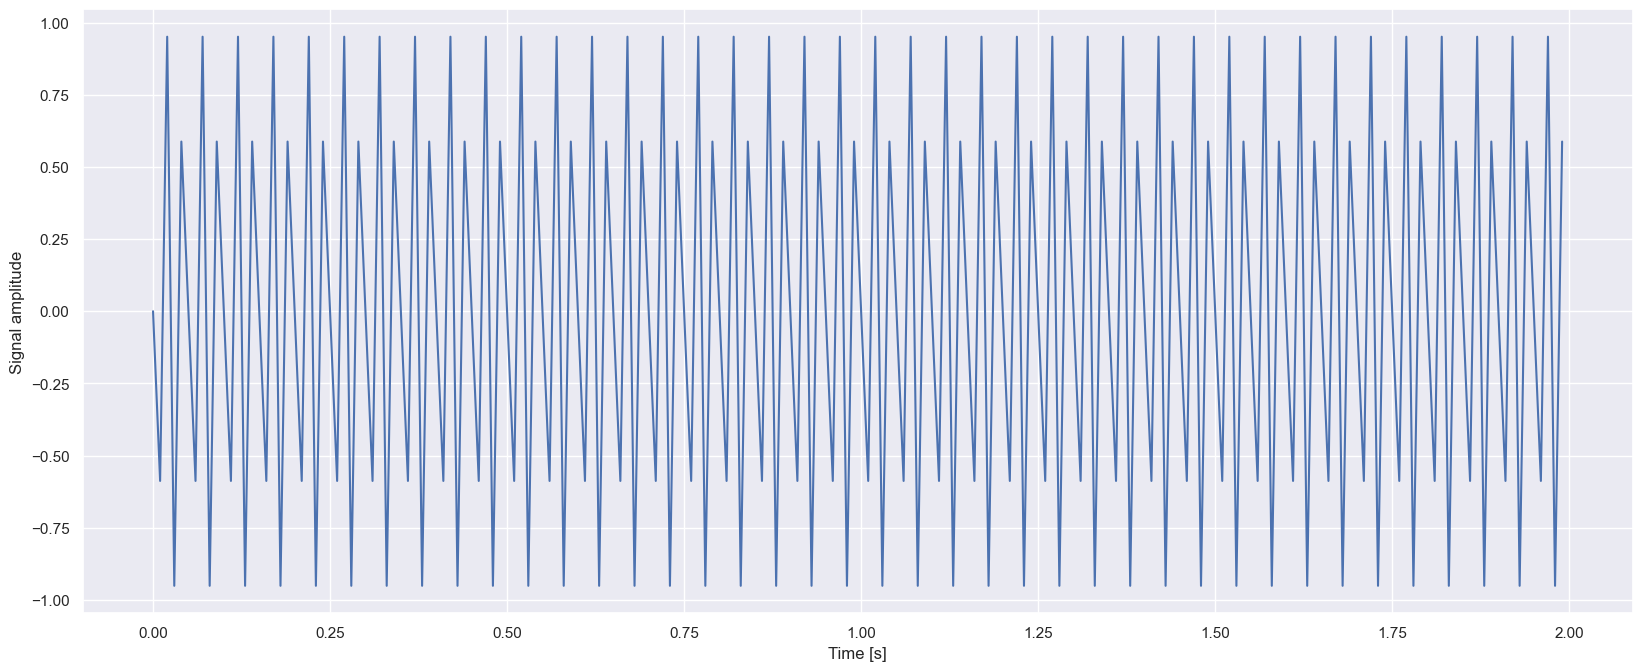

In [101]:
f = 60  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

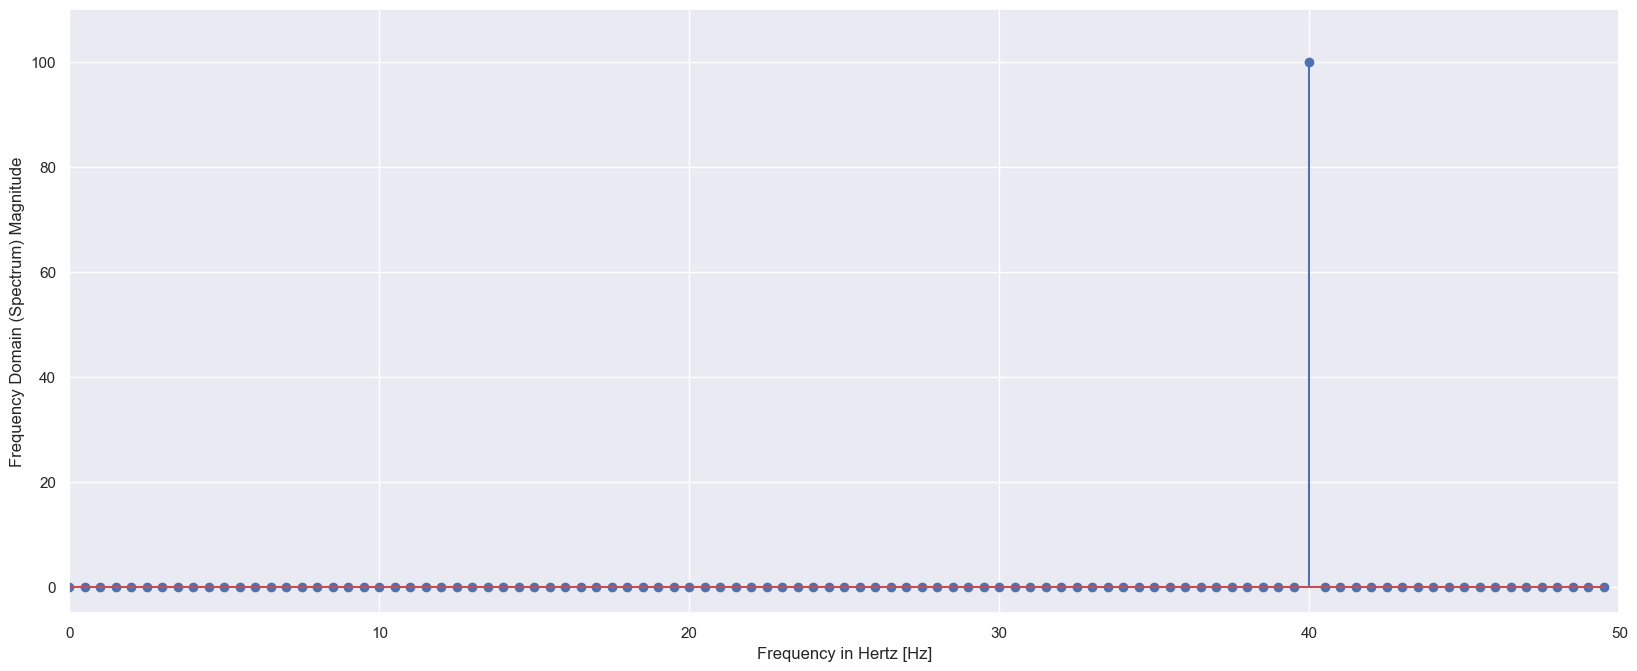

In [106]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, f_s / 2)
ax.set_ylim(-5, 110);

In [103]:
binD = np.where(np.abs(X) ==max(np.abs(X)))
#  max(np.absolute(X[999][1])))
print(binD[0][0])
print(np.abs(X[binD[0][0]-2:binD[0][0]+2]))
print(freqs[binD[0][0]-2:binD[0][0]+2])
print(np.abs(X[binD][0]))
print(freqs[binD][0])

80
[4.26486925e-13 1.16981883e-12 1.00000000e+02 8.37759192e-13]
[39.  39.5 40.  40.5]
99.99999999999991
40.0
